<!-- ![Alt Text](https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/header.png) -->

<div style="display: flex; justify-content: flex-start; align-items: center;">
    <a href="https://colab.research.google.com/github/msfasha/307304-Data-Mining/blob/main/20243/Part%204-Clustering/2-dbscan%20algorithm.ipynb" target="_blank">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 25px; margin-right: 20px;">
    </a>
        <a href="https://www.youtube.com/watch?v=RDZUdRSDOok" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="KMeans Youtube Video" style="height: 40px;">
    </a>
</div>

#### 1. **Introduction to DBSCAN**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** is a density-based clustering algorithm used to identify clusters in datasets based on the density of data points. It is particularly useful for discovering clusters of arbitrary shape and handling noise (outliers).

Unlike K-Means, DBSCAN does not require specifying the number of clusters in advance and can identify outliers as points that do not belong to any cluster.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-1.png" alt="DBSCAN Algorithm" width="600"/>
</div>

---

#### 2. **How Does DBSCAN Work**

DBSCAN groups points that are closely packed together, marking as outliers points that lie alone in low-density regions. It works based on two key parameters:
- **Epsilon ($ \epsilon $)**: The maximum distance between two points for them to be considered as part of the same neighborhood.
- **MinPoints**: The minimum number of points required to form a dense region (i.e., a cluster).

Key concepts in DBSCAN:
- **Core Point**: A point with at least MinPoints (**Including Itself**) within a radius $ \epsilon $.
- **Border Point**: A point that has fewer than MinPoints within $ \epsilon $, but is in the neighborhood of a core point.
- **Noise Point (Outlier)**: A point that is neither a core nor a border point.

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-2.png" alt="DBSCAN Algorithm" width="600"/>
</div>

**DBSCAN Steps**:<br>
i. For each point in the dataset, identify its neighborhood based on $ \epsilon $ and MinPoints.<br>
ii. If a point is a core point, form a cluster around it and recursively expand the cluster by including all density-reachable points.<br>
iii. Continue until all points have been visited, and label remaining points that do not belong to any cluster as noise.<br>

DBSCAN creates clusters by iteratively adding points that are density-reachable from core points.

**Density-Reachable (directly and indirectly):**

A point y is said to be ‘reachable’ from x if there is a path p₁, …, pₙ with p₁ = x and pₙ = y, where each pᵢ₊₁ on the path must be core points, with the possible exception of pₙ.

An object y is directly density-reachable from object x, if x is a core object and y is in x’s epsilon(ε)-neighborhood.

a is directly density-reachable from b.

b is directly density-reachable from c.

a is (indirectly) density reachable from d.

d is not density-reachable from a, since a is not a core point.

See the image below: circles showing ε-neighborhoods with core points, border points, and outliers. Minimum points = 4.)

**How Does the Algorithm Work**?

Min. Points = 3
ε = 1 cm

Step 1:
Pick a random point that has not yet been assigned to a cluster or designated as an Outlier.
Determine if it is a Core Point. If not, label the point as Outlier.

Step 2:
Once a Core Point has been found, add all directly reachable to its cluster.
Then do neighbor jumps to each reachable point and add them to the cluster.
If an Outlier has been added, label it as a border point.

Step 3:
Repeat these steps until all points are assigned a cluster or label as Outlier.

(Illustration: points with one marked as "Core", one as "Border", others as "Outlier", showing the cluster

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan_algorithm_steps.png" alt="DBSCAN Algorithm Steps" width="600"/>
</div>


<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/density_reachable.png" alt="Density Reachable" width="600"/>
</div>

 <div style="display: flex; justify-content: flex-start; align-items: center;">
   DBSCAN in Action
  <a href="https://www.youtube.com/watch?v=h53WMIImUuc" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="DBSCAN Youtube Video" style="height: 40px;margin-left: 20px;">
    </a>
      <a href="https://www.youtube.com/watch?v=sJQHz97sCZ0" target="_blank">
        <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/youtube.png" alt="DBSCAN Youtube Video" style="height: 40px;margin-left: 20px;">
    </a>
</div>

##### Here is a detailed example showing the calculations performed by the algorithm:

**i. Compute the Distance for Each Point**

- In this step, we compute the Euclidean distances between all points in the dataset, creating a **lower triangular distance matrix**.
- Each cell in the matrix represents the distance between two points, while the diagonal is excluded since it represents the distance of a point to itself.
This matrix forms the basis for identifying the neighbors of each point within the epsilon (ε = 1.9) radius. 
    

| Points         | P1   | P2   | P3   | P4   | P5   | P6   | P7   | P8   | P9   | P10  | P11  | P12  |
|----------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| P1: (3,7)     |       |       |       |       |       |       |       |       |       |       |       |       |
| P2: (4,6)     | 1.41  |       |       |       |       |       |       |       |       |       |       |       |
| P3: (5,5)     | 2.83  | 1.41  |       |       |       |       |       |       |       |       |       |       |
| P4: (6,4)     | 4.24  | 2.83  | 1.41  |       |       |       |       |       |       |       |       |       |
| P5: (7,3)     | 5.66  | 4.24  | 2.83  | 1.41  |       |       |       |       |       |       |       |       |
| P6: (6,2)     | 5.83  | 4.47  | 3.16  | 2.24  | 1.00  |       |       |       |       |       |       |       |
| P7: (7,2)     | 6.40  | 5.00  | 3.61  | 2.24  | 1.00  | 1.00  |       |       |       |       |       |       |
| P8: (8,4)     | 5.83  | 4.47  | 3.16  | 2.24  | 1.41  | 2.24  | 1.41  |       |       |       |       |       |
| P9: (3,3)     | 5.00  | 4.24  | 3.16  | 3.16  | 4.12  | 3.00  | 3.16  | 4.47  |       |       |       |       |
| P10: (2,6)    | 1.41  | 2.00  | 3.16  | 4.24  | 5.39  | 5.83  | 6.40  | 6.32  | 3.00  |       |       |       |
| P11: (3,5)    | 2.00  | 1.41  | 2.00  | 3.16  | 4.24  | 4.47  | 5.00  | 4.47  | 2.24  | 1.00  |       |       |
| P12: (2,4)    | 3.16  | 2.83  | 3.16  | 4.00  | 5.10  | 5.39  | 5.83  | 5.10  | 2.00  | 2.00  | 1.41  |   0   |





**How to Read the Triangular Distances Matrix**

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-triangle-matrix.png" alt="How to Read DBSCAN Triangular Distances Matrix" width="600"/>
</div>

**ii. Count the Number of Neighbors for Each Point**

- After computing the distances for each point, we list the neighbors of each point within the ε = 1.9 radius and counting them. 
- This information will be used to classify points as following:
    - a core point requires at least 4 neighbors
    - a border point is connected to a core point but has fewer than 4 neighbors
    - noise points which are the nodes that has not no neighbors
- For example:
    - P1 has neighbors P2 and P10, as seen in the the table below. 
    - P5 has 4 neighbors (P4, P6, P7, P8), while P8 has only 1 neighbor (P5) and P9 has no neighbors.

| Point        | Neighbors (ε=1.9)       | # Neighbors |
|--------------|--------------------------|-------------|
| P1: (3,7)    | P2, P10                 | 2           |
| P2: (4,6)    | P1, P3, P11             | 3           |
| P3: (5,5)    | P2, P4                  | 2           |
| P4: (6,4)    | P3, P5                  | 2           |
| P5: (7,3)    | P4, P6, P7, P8          | 4           |
| P6: (6,2)    | P5, P7                  | 2           |
| P7: (7,2)    | P5, P6                  | 2           |
| P8: (8,4)    | P5                      | 1           |
| P9: (3,3)    | -                       | 0           |
| P10: (2,6)   | P1, P11                 | 2           |
| P11: (3,5)   | P2, P10, P12            | 3           |
| P12: (2,4)   | P9, P11                 | 2           |

**iii. Classify Points into Core, Border or Noise**

In this step, we classify each point in the dataset as either **Core, Border, or Noise based on the number of neighbors within the epsilon (ε = 1.9) radius**:

a. **Core Points**: Points that have at least 4 neighbors within the ε radius. For example:
   - **P2** is a core point because it has 3 neighbors: P1, P3, and P11.
   - **P5** is a core point because it has 4 neighbors: P4, P6, P7, and P8.
   - **P11** is a core point because it has 3 neighbors (P2, P10, and P12) and is connected to the core point P2.

b. **Border Points**: Points that have fewer than 4 neighbors but are within the ε radius of at least one core point. For example:
   - **P1** is a border point because it has only 2 neighbors (P2 and P10) but is connected to the core point P2.

c. **Noise Points**: Points that have no neighbors within the ε radius and are not connected to any core point. For example:
   - **P9** is classified as noise because it has no neighbors.

This step ensures that each point is categorized appropriately, which is essential for defining the clusters in the DBSCAN algorithm. Core points form the dense regions of clusters, border points connect to these dense regions, and noise points are outliers.

| Point        | Neighbors (ε=1.9)       | Status  |
|--------------|-------------------------|---------|
| P1: (3,7)    | P2, P10                 | Border  |
| P2: (4,6)    | P1, P3, P11             | **Core**|
| P3: (5,5)    | P2, P4                  | Border  |
| P4: (6,4)    | P3, P5                  | Border  |
| P5: (7,3)    | P4, P6, P7, P8          | **Core**|
| P6: (6,2)    | P5, P7                  | Border  |
| P7: (7,2)    | P5, P6                  | Border  |
| P8: (8,4)    | P5                      | Border  |
| P9: (3,3)    | -                       | Noise   |
| P10: (2,6)   | P1, P2, P11             | Border  |
| P11: (3,5)   | P2, P10, P12            | **Core**|
| P12: (2,4)   | P9, P11                 | Border  |


As demonstrated by the table above, the DBSCAN algorithm identified **three core nodes** and **one noise point** based on the parameters `ε = 1.9` and `minPts = 4, <br>
Nevertheless, DBSCAN will result in **TWO** clusters as **P2 and P11** will be joined into a single cluster.

- **Cluster 0**: Includes points P1, P2, P3, P10, P11, and P12. These points form a dense region in the upper-left area of the diagram.
- **Cluster 1**: Includes points P4, P5, P6, P7, and P8. This cluster represents another dense region in the lower-right part of the diagram.
- **Noise Point**: P9 is classified as noise because it does not have any neighbors within the ε radius and is not connected to any core point. It is treated as an outlier.

#### Visualize the Clusters using a Scatter Plot

<div style="text-align: center;">
    <img src="https://raw.githubusercontent.com/msfasha/307304-Data-Mining/main/images/dbscan-clusters.png" alt="DBSCAN Algorithm" width="600"/>
</div>

The scatter plot visually demonstrates the clustering results:

- **Clusters**:
  - Cluster 0 is represented by one color (e.g., red) and primarily occupies the upper-left region.
  - Cluster 1 is represented by another color (e.g., orange) and spans the lower-right region.
- **Noise Point**:
  - P9 is marked in black, clearly showing that it is isolated and does not belong to any cluster.

---

#### 3. **DBSCAN in Python**

#### Python - Example 1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Step 1: Define the dataset
points = np.array([
    [3, 7],  # P1
    [4, 6],  # P2
    [5, 5],  # P3
    [6, 4],  # P4
    [7, 3],  # P5
    [6, 2],  # P6
    [7, 2],  # P7
    [8, 4],  # P8
    [3, 3],  # P9
    [2, 6],  # P10
    [3, 5],  # P11
    [2, 4],  # P12
])

# Step 2: Set DBSCAN parameters
epsilon = 1.9
min_pts = 4

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_pts)
labels = dbscan.fit_predict(points)

# Create a DataFrame to hold the points and their cluster labels
df = pd.DataFrame(points, columns=['X1', 'X2'])
df['Cluster'] = labels  # Add cluster labels to the DataFrame
df

,X1,X2,Cluster
0,3,7,0
1,4,6,0
2,5,5,0
3,6,4,1
4,7,3,1
5,6,2,1
6,7,2,1
7,8,4,1
8,3,3,-1
9,2,6,0


**Print out core points**

In [8]:
# Print out the core points
core_points = points[dbscan.core_sample_indices_]
print("Core points:\n", core_points)

Core points:
 [[4 6]
 [7 3]
 [3 5]]


**Print Out The Classification of All Nodes, Core, Border or Noise**

The code below is for demonstration only i.e. studying this code below is optional

In [ ]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Assign point types
point_types = []
for i in range(len(labels)):
    if labels[i] == -1:
        point_types.append('Noise')
    elif core_samples_mask[i]:
        point_types.append('Core')
    else:
        point_types.append('Border')

# Add to DataFrame
df['Point_Type'] = point_types
df

,X1,X2,Cluster,Point_Type
0,3,7,0,Border
1,4,6,0,Core
2,5,5,0,Border
3,6,4,1,Border
4,7,3,1,Core
5,6,2,1,Border
6,7,2,1,Border
7,8,4,1,Border
8,3,3,-1,Noise
9,2,6,0,Border


**Validate the Triangular Distances Matrix**

The code below is for demonstration only i.e. studying this code below is optional

In [11]:

from sklearn.neighbors import NearestNeighbors

# Use NearestNeighbors to find neighbors within the epsilon radius
nbrs = NearestNeighbors(radius=epsilon)
nbrs.fit(points)
all_neighbors = nbrs.radius_neighbors(points, return_distance=False)

# Build the table of neighbors
point_names = [f'P{i+1}: ({x[0]},{x[1]})' for i, x in enumerate(points)]
neighbors_list = []
neighbor_counts = []

for i, neighbors in enumerate(all_neighbors):
    # Remove self from neighbor list
    neighbor_indices = neighbors[neighbors != i]
    neighbor_labels = [f'P{j+1}' for j in neighbor_indices]
    neighbors_list.append(', '.join(neighbor_labels))
    neighbor_counts.append(len(neighbor_indices))

# Create DataFrame
neighbors_df = pd.DataFrame({
    'Point': point_names,
    'Neighbors (ε=1.9)': neighbors_list,
    '# Neighbors': neighbor_counts
})

neighbors_df


,Point,Neighbors (ε=1.9),# Neighbors
0,"P1: (3,7)","P2, P10",2
1,"P2: (4,6)","P1, P3, P11",3
2,"P3: (5,5)","P2, P4",2
3,"P4: (6,4)","P3, P5",2
4,"P5: (7,3)","P4, P6, P7, P8",4
5,"P6: (6,2)","P5, P7",2
6,"P7: (7,2)","P5, P6",2
7,"P8: (8,4)",P5,1
8,"P9: (3,3)",P12,1
9,"P10: (2,6)","P1, P11",2


##### Plot the Clusters

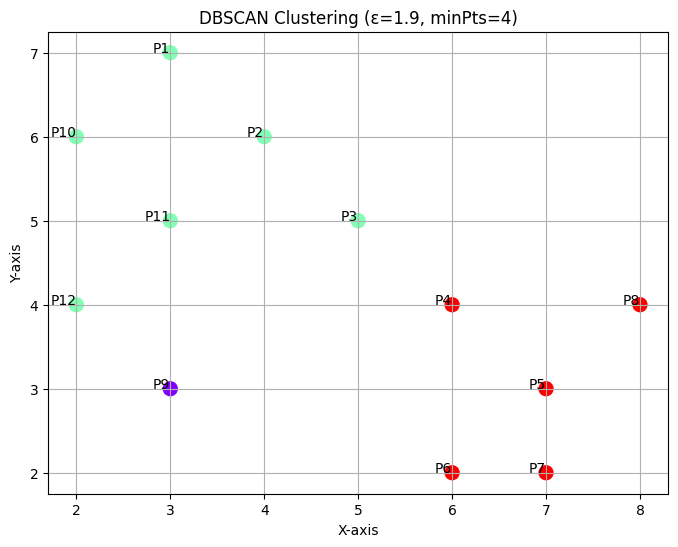

In [4]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['X2'], c=df['Cluster'], cmap='rainbow', marker='o', s=100)
plt.title(f'DBSCAN Clustering (ε={epsilon}, minPts={min_pts})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Annotate points
for i, (x, y) in enumerate(zip(df['X1'], df['X2'])):
    plt.text(x, y, f'P{i+1}', fontsize=10, ha='right')

plt.grid(True)
plt.show()


##### Explanation of the Code:
1. **Dataset Creation**: The `points` array defines the dataset with coordinates for each point (e.g., P1 = (3,7), P2 = (4,6)).
2. **DBSCAN Implementation**:
   - The `DBSCAN` class from `sklearn.cluster` is used with `eps=1.9` (ε) and `min_samples=4` (minPts).
   - The `fit_predict()` method clusters the data and assigns labels to each point.
3. **Printing Results**:
   - Each point's cluster label is printed, with noise points labeled as `Noise`.
4. **Visualization**:
   - The scatter plot shows the clusters with distinct colors and noise points in black. Annotations (P1, P2, etc.) make it easy to identify each point.

---

#### 4. **Advantages and Disadvantages of DBSCAN**

**Advantages**:
- Does not require specifying the number of clusters in advance.
- Can find arbitrarily shaped clusters.
- Identifies outliers as noise points.
  
**Disadvantages**:
- Performance depends on choosing appropriate values for $ \epsilon $ and MinPoints.
- Struggles with varying densities of clusters.
- High-dimensional data can make it difficult to choose $ \epsilon $.